<a href="https://colab.research.google.com/github/amitmeel/TensorFlow-Developer-Certificate-in-2021-Zero-to-Mastery/blob/develop/01_nn_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!/usr/bin/nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [1]:
## importing libraries
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

print(f"tf version {tf.__version__}")

tf version 2.6.0


In [2]:
## create data to view and fit

#create feature
X = np.array([-7, -4, -1, 2.0, 5.0, 8, 11, 14]) #independent variables

#create labels or output
y = np.array([3.0, 6.0, 9, 12, 15, 18, 21, 24]) #dependent variable


Text(0, 0.5, 'y')

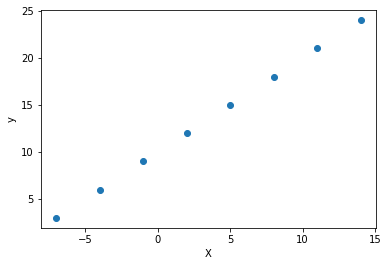

In [3]:
plt.scatter(X,y);
plt.xlabel("X")
plt.ylabel("y")


In [4]:
y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
## input and output shape

#create a demo tensor for house price prediction
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([937700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937700], dtype=int32)>)

In [6]:
# turn numpy arrasy to tensor

X = tf.constant(X)
y =tf.constant(y)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Typical architecture of a regresison neural network

The word *typical* is on purpose.

Why?

Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.

Yes, the previous sentence is vague but we'll see this in action shortly.

| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

Again, if you're new to neural networks and deep learning in general, much of the above table won't make sense. But don't worry, we'll be getting hands-on with all of it soon.

> 🔑 **Note:** A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a **parameter** usually describes something a model learns on its own (a value not explicitly set by an analyst).

Okay, enough talk, let's get started writing code.

To use TensorFlow, we'll import it as the common alias `tf` (short for TensorFlow).

## Steps in modelling with TensorFlow

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.


In [8]:
# set seed for reproducible results
tf.random.set_seed(42)

#create a model using sequential api
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

# compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 642ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.predict([17])

array([[12.716021]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

![various options you can use to improve a neural network model](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png)
*There are many different ways to potentially improve a neural network. Some of the most common include: increasing the number of layers (making the network deeper), increasing the number of hidden units (making the network wider) and changing the learning rate. Because these values are all human-changeable, they're referred to as [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)) and the practice of trying to find the best hyperparameters is referred to as [hyperparameter tuning](https://en.wikipedia.org/wiki/Hyperparameter_optimization).*

Woah. We just introduced a bunch of possible steps. The important thing to remember is how you alter each of these will depend on the problem you're working on.

And the good thing is, over the next few problems, we'll get hands-on with all of them.

For now, let's keep it simple, all we'll do is train our model for longer (everything else will stay the same).

In [11]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(4),
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 349ms/step - loss: 13.8825 - mae: 13.8825
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 13.6618 - mae: 13.6618
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.4425 - mae: 13.4425
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 13.2236 - mae: 13.2236
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.0040 - mae: 13.0040
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.7824 - mae: 12.7824
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5579 - mae: 12.5579
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.3293 - mae: 12.3293
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.0955 - mae: 12.0955
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 11.8552 - mae: 11.8552
Epoch 11/100
1/1 [==============================] - 0s 6

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.predict([17])

array([[30.848078]], dtype=float32)

## Evaluating a model 

A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```

The tweaking comes from maybe not building a model from scratch but adjusting an existing one.

### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize." 

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:
* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?

Let's start by visualizing the model.

But first, we'll create a little bit of a bigger dataset and a new model we can use (it'll be the same as before, but the more practice the better).


In [14]:
##making a biger dataset

X = np.arange(-100,100, 4)
y = np.arange(-90, 110, 4)


In [15]:
X.shape, y.shape

((50,), (50,))

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
len(X_train), len(y_train)

(40, 40)

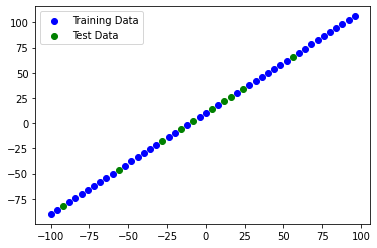

In [18]:
plt.scatter(X_train, y_train, c='b', label='Training Data')
plt.scatter(X_test, y_test, c='g', label='Test Data')
plt.legend();

With this graph in mind, what we'll be trying to do is build a model which learns the pattern in the blue dots (`X_train`) to draw the green dots (`X_test`).

In [19]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

model.fit(X,y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 4ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/100
2/2 [==============================] - 0s 13ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9966 - mae: 9.9966
Epoch 11/100
2/2 [==============================] - 0s 4ms/

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.mae,
              metrics=["mae"])

model.summary()  #since we have define the input shape, we can see the summary

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

> 📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out [MIT's introduction to deep learning video](https://youtu.be/njKP3FqW3Sk).

In [22]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

In [23]:
from tensorflow.keras.utils import plot_model

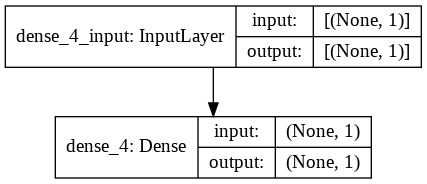

In [24]:
plot_model(model, show_shapes=True)

In [25]:
y_preds = model.predict(X_test)

In [31]:
y_test

array([  2,  34, -46,  22,  26, -82,  -6,  66, -18,  14])

In [26]:
y_preds

array([[  -8.147981],
       [  29.173943],
       [ -64.13086 ],
       [  15.178221],
       [  19.84346 ],
       [-106.11803 ],
       [ -17.478462],
       [  66.495865],
       [ -31.474182],
       [   5.84774 ]], dtype=float32)

In [27]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

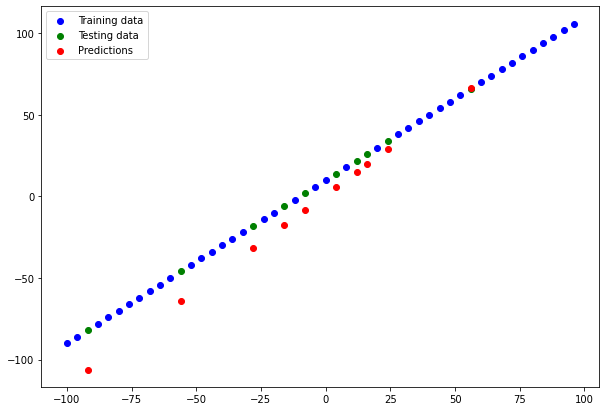

In [28]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [29]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 122ms/step - loss: 10.3802 - mae: 10.3802


[10.38020133972168, 10.38020133972168]

In [32]:

?model.evaluate()

In [38]:
mae = tf.metrics.mean_absolute_error(y_test, y_preds)

In [39]:
### 
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 33.65919 ,  36.304363,  68.904686,  31.435644,  32.36869 ,
       107.31803 ,  37.391384,  65.29586 ,  45.68451 ,  31.2     ],
      dtype=float32)>

Huh? That's strange, MAE should be a single output.

Instead, we get 10 values.

This is because our y_test and y_preds tensors are different shapes.

In [41]:
y_test.shape, y_preds.shape

((10,), (10, 1))

In [44]:
y_test.dtype, y_preds.dtype

(dtype('int64'), dtype('float32'))

In [46]:
# What do they look like?
y_test, y_preds.squeeze()

(array([  2,  34, -46,  22,  26, -82,  -6,  66, -18,  14]),
 array([  -8.147981,   29.173943,  -64.13086 ,   15.178221,   19.84346 ,
        -106.11803 ,  -17.478462,   66.495865,  -31.474182,    5.84774 ],
       dtype=float32))

In [47]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test, 
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.380201>

In [49]:
mse = tf.metrics.mean_squared_error(y_test, y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=150.11331>

In [50]:
##MAE using tesnsorflow functions
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=10.380201244354248>

In [51]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)


Running experiments to improve a model
After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:

Get more data - get more examples for your model to train on (more opportunities to learn patterns).
Make your model larger (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
Train for longer - give your model more of a chance to find the patterns in the data.
Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:

model_1 - same as original model, 1 layer, trained for 100 epochs.
model_2 - 2 layers, trained for 100 epochs.
model_3 - 2 layers, trained for 500 epochs.